In [1]:
import matplotlib.pyplot as plt
import mnist
import numpy as np

# this is used to silence the tensorflow built warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

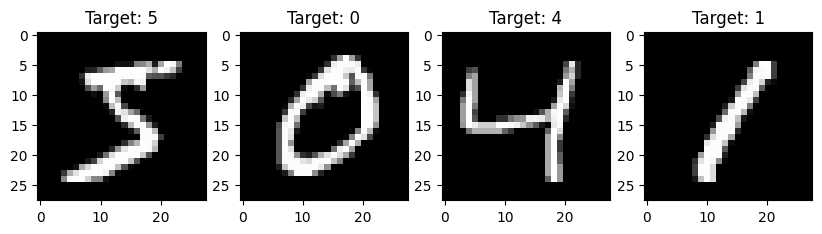

In [2]:
X_train = mnist.train_images()
y_train = mnist.train_labels()
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
for ax, image, label in zip(axes, X_train, y_train):
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Target: {label}')
plt.show()

In [3]:
# there is a need to normalize, so each pixel code [0, 255] will be made into range [1, 1]
X_train = 2*((X_train - np.min(X_train))/(np.ptp(X_train))-1)
# np.ptp = max(x) - min(x)
# print(np.ptp(X_train))
# print(X_train.shape)
"""flattening the images to 2d arrays"""
X_train = X_train.reshape((-1, 784))  # -1 = number of rows is calculated automatically, 784=28x28 - im size in pixels

In [4]:
# MODELING
from tensorflow.keras.models import Sequential
model = Sequential()
from tensorflow.keras.layers import Dense
# dense is used to collect data from all the neurons in the previous layer

In [5]:
# first layer (activation function and size of the input layer)
model.add(Dense(64, activation = 'sigmoid', input_shape = (784,)))
# second layer
model.add(Dense(64, activation = 'sigmoid'))  # sigmoid function is used for binary classifiaction
# output layer
model.add(Dense(10, activation = 'softmax'))  # softmax is used for multiple classification

In [6]:
model.compile(
  loss = 'categorical_crossentropy',
  optimizer = 'sgd',
  metrics = ['accuracy']
)

In [7]:
# training
from tensorflow.keras.utils import to_categorical

In [8]:
model.fit(
  X_train, # where to train
  to_categorical(y_train), # doing one-hot encoding of the y train
  epochs = 10 # how many times will the process redo on the full DS
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1442 - accuracy: 0.4027
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4408 - accuracy: 0.6969
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8542 - accuracy: 0.8143
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6104 - accuracy: 0.8554
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4947 - accuracy: 0.8768
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4299 - accuracy: 0.8867
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3892 - accuracy: 0.8953
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3607 - accuracy: 0.8999
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3391 - accuracy: 0.9044
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.321

In [9]:
# test data
X_test = mnist.test_images()
y_test = mnist.test_labels()
X_test = 2. * (X_test - np.min(X_test)) / np.ptp(X_test) - 1
X_test = X_test.reshape((-1, 784))

In [10]:
model.evaluate(
  X_test, # where to apply
  to_categorical(y_test) # one-hot encoding of the target
)

313/313 [==============================] - 1s 1ms/step - loss: 0.3420 - accuracy: 0.9018


[0.34196504950523376, 0.9017999768257141]

In [12]:
num = 10
predicted_labels = model.predict(X_test[-num:])
predicted_classes = np.argmax(predicted_labels, axis=1)

for i in range(num):
    actual_number = y_test[-num + i]
    predicted_number = predicted_classes[i]
    print(f"{i+1}. Actual number - {actual_number}. Predicted number - {predicted_number}")

1/1 [==============================] - 0s 20ms/step
1. Actual number - 7. Predicted number - 7
2. Actual number - 8. Predicted number - 8
3. Actual number - 9. Predicted number - 9
4. Actual number - 0. Predicted number - 0
5. Actual number - 1. Predicted number - 1
6. Actual number - 2. Predicted number - 2
7. Actual number - 3. Predicted number - 3
8. Actual number - 4. Predicted number - 4
9. Actual number - 5. Predicted number - 5
10. Actual number - 6. Predicted number - 6
